In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

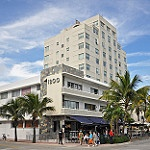

In [2]:
# Let's have a look at the data

im=Image.open('input/intel-image-classification/seg_train/seg_train/buildings/10032.jpg')
im

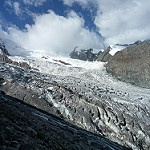

In [3]:
# Let's have a look at another image

im2=Image.open('input/intel-image-classification/seg_train/seg_train/glacier/10003.jpg')
im2

In [4]:
# Creating the model

model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3000,activation='relu'))
model.add(Dense(units=6,activation='softmax'))


# first model we built but turns out it's not fit best for the dataset
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(6, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 3000)              92259000  
                                                                 
 dense_1 (Dense)             (None, 6)                 18006     
                                                                 
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
____________________________________________

In [6]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('input/intel-image-classification/seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32)
test_set = test_datagen.flow_from_directory('input/intel-image-classification/seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 32)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
# Define the callback function
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.94:
            print("\nReached 94% accuracy, stopping training!")
            self.model.stop_training = True

# Create an instance of the callback
accuracy_callback = AccuracyCallback()

In [9]:
len(set(training_set.classes))

6

In [10]:
fitted_model = model.fit(training_set,
                        steps_per_epoch = 100,
                        epochs = 200,
                        validation_data = test_set,
                        validation_steps = 100, callbacks = accuracy_callback)

Epoch 1/200
100/100 [==============================] - 8s 57ms/step - loss: 2.5990 - accuracy: 0.4944 - val_loss: 1.2195 - val_accuracy: 0.5777
Epoch 2/200
100/100 [==============================] - 3s 33ms/step - loss: 0.9731 - accuracy: 0.6347
Epoch 3/200
100/100 [==============================] - 3s 33ms/step - loss: 0.9041 - accuracy: 0.6681
Epoch 4/200
100/100 [==============================] - 3s 34ms/step - loss: 0.8603 - accuracy: 0.6795
Epoch 5/200
100/100 [==============================] - 3s 34ms/step - loss: 0.8221 - accuracy: 0.7031
Epoch 6/200
100/100 [==============================] - 4s 36ms/step - loss: 0.7967 - accuracy: 0.7078
Epoch 7/200
100/100 [==============================] - 3s 35ms/step - loss: 0.7764 - accuracy: 0.7094
Epoch 8/200
100/100 [==============================] - 4s 35ms/step - loss: 0.7603 - accuracy: 0.7072
Epoch 9/200
100/100 [==============================] - 4s 37ms/step - loss: 0.7378 - accuracy: 0.7341
Epoch 10/200
100/100 [==================

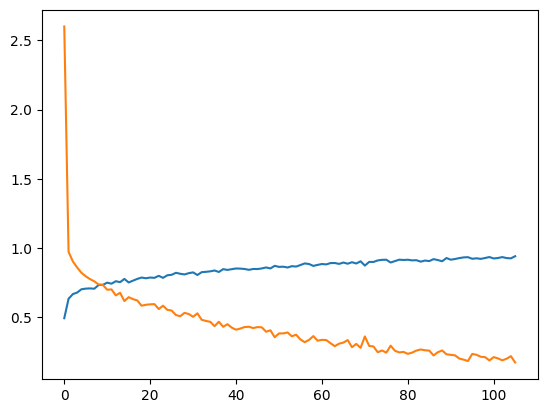

In [11]:
plt.plot(range(len(fitted_model.history['accuracy'])), fitted_model.history['accuracy'])
plt.plot(range(len(fitted_model.history['loss'])), fitted_model.history['loss'])

In [12]:
def image_predictions(path):
    predictions = model.predict(test_set)
    predicted_classes = np.argmax(predictions, axis=-1)
    l=os.listdir('input/intel-image-classification/seg_train/seg_train')
    l.sort()
    return l[predicted_classes[0]]

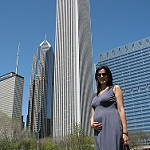

In [41]:
imagee1=Image.open('input/intel-image-classification/seg_pred/seg_pred/20233.jpg')
imagee1

In [43]:
# Let's make prediction for the above image
image_predictions('imagee1')

94/94 [==============================] - 1s 15ms/step


'buildings'

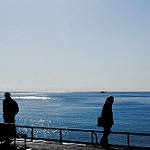

In [39]:
imagee2=Image.open('input/intel-image-classification/seg_pred/seg_pred/25.jpg')
imagee2

In [28]:
# Let's make prediction for the above image
image_predictions('imagee2')

94/94 [==============================] - 2s 17ms/step


'sea'

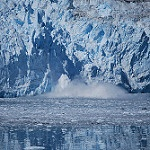

In [47]:
imagee3=Image.open('input/intel-image-classification/seg_pred/seg_pred/21235.jpg')
imagee3

In [49]:
# Let's make prediction for the above image
image_predictions('imagee3')

94/94 [==============================] - 2s 16ms/step


'glacier'

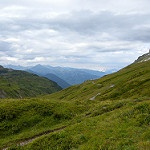

In [50]:
imagee4=Image.open('input/intel-image-classification/seg_pred/seg_pred/21315.jpg')
imagee4

In [53]:
# Let's make prediction for the above image
image_predictions('imagee4')

94/94 [==============================] - 2s 17ms/step


'mountain'

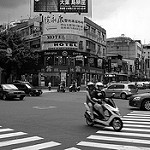

In [59]:
imagee4=Image.open('input/intel-image-classification/seg_pred/seg_pred/24296.jpg')
imagee4

In [61]:
# Let's make prediction for the above image
image_predictions('imagee4')

94/94 [==============================] - 2s 18ms/step


'street'

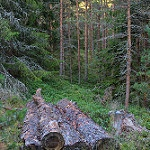

In [62]:
imagee4=Image.open('input/intel-image-classification/seg_pred/seg_pred/20827.jpg')
imagee4

In [67]:
# Let's make prediction for the above image
image_predictions('imagee4')

94/94 [==============================] - 2s 17ms/step


'forest'